In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset and labels
data_url = "https://raw.githubusercontent.com/DwaipayanDutta/Assignment/main/Data%20Files/train.csv"
labels_url = "https://raw.githubusercontent.com/DwaipayanDutta/Assignment/main/Data%20Files/train_churn_labels.csv"

In [4]:
# Read the data
data = pd.read_csv(data_url)
labels = pd.read_csv(labels_url)
# Encode labels: -1 becomes 0, and 1 remains 1
labels['Label'] = labels['Label'].replace(-1, 0)
# Append labels to the dataset
data['Label'] = labels['Label']

# Data Preprocessing
X = data.drop(columns=['Label'])
y = data['Label']                  # Labels
# Drop columns that have all missing values
X = X.dropna(axis=1, how='all')
# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [5]:
categorical_cols 

['Var191',
 'Var192',
 'Var193',
 'Var194',
 'Var195',
 'Var196',
 'Var197',
 'Var198',
 'Var199',
 'Var200',
 'Var201',
 'Var202',
 'Var203',
 'Var204',
 'Var205',
 'Var206',
 'Var207',
 'Var208',
 'Var210',
 'Var211',
 'Var212',
 'Var213',
 'Var214',
 'Var215',
 'Var216',
 'Var217',
 'Var218',
 'Var219',
 'Var220',
 'Var221',
 'Var222',
 'Var223',
 'Var224',
 'Var225',
 'Var226',
 'Var227',
 'Var228',
 'Var229']

In [6]:
# Create a preprocessing pipeline for categorical features and imputation for missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=[np.number]).columns.tolist())  
    ],
    remainder='passthrough'  
)
# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Var191', 'Var192', 'Var193',
                                                   'Var194', 'Var195', 'Var196',
                                                   'Var197', 'Var198', 'Var199',
                                                   'Var200', 'Var201', 'Var202',
                                                   'Var203', 'Var204', 'Var205',
                                                   'Var206', 'Var207', 'Var208',
                                                   'Var210', 'Var211', 'Var212',
                                                   'Var213', 'Var214', 'Var215'...
                                                   'Var219', 'Var220', 'Var221', ...]),
                                                 ('num', SimpleImputer(),
                                                  ['Var1', 'Var2', 'Var3',
                                                   'Var4', 'Var5', 'Var6',
                                                   'Var7', 'Var9', 'Var10',
                                                   'Var11', 'Var12', 'Var13',
                                                   'Var14', 'Var16', 'Var17',
                                                   'Var18', 'Var19', 'Var21',
                                                   'Var22', 'Var23', 'Var24',
                                                   'Var25', 'Var26', 'Var27',
                                                   'Var28', 'Var29', 'Var30',
                                                   'Var33', 'Var34', 'Var35', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Var191', 'Var192', 'Var193',
                                                   'Var194', 'Var195', 'Var196',
                                                   'Var197', 'Var198', 'Var199',
                                                   'Var200', 'Var201', 'Var202',
                                                   'Var203', 'Var204', 'Var205',
                                                   'Var206', 'Var207', 'Var208',
                                                   'Var210', 'Var211', 'Var212',
                                                   'Var213', 'Var214', 'Var215'...
                                                   'Var219', 'Var220', 'Var221', ...]),
                                                 ('num', SimpleImputer(),
                                                  ['Var1', 'Var2', 'Var3',
                                                   'Var4', 'Var5', 'Var6',
                                                   'Var7', 'Var9', 'Var10',
                                                   'Var11', 'Var12', 'Var13',
                                                   'Var14', 'Var16', 'Var17',
                                                   'Var18', 'Var19', 'Var21',
                                                   'Var22', 'Var23', 'Var24',
                                                   'Var25', 'Var26', 'Var27',
                                                   'Var28', 'Var29', 'Var30',
                                                   'Var33', 'Var34', 'Var35', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [8]:
# Model Evaluation with 10-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Cross-validation scores: [0.92575 0.92575 0.92575 0.9255  0.9255  0.9255  0.9255  0.9255  0.9255
 0.9255 ]
Mean CV score: 0.9255749999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9305
           1       0.00      0.00      0.00       695

    accuracy                           0.93     10000
   macro avg       0.47      0.50      0.48     10000
weighted avg       0.87      0.93      0.90     10000

Accuracy: 0.9305


C:\Users\dwaip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dwaip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dwaip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9305    0]
 [ 695    0]]


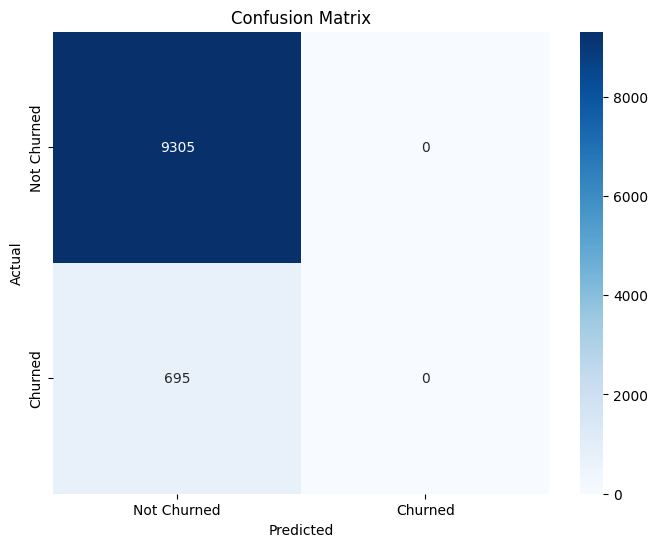

In [13]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Save the trained model as a .pkl file using joblib
joblib.dump(pipeline, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'
